In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import ListedColormap

In [2]:
# loading datasets
ycom = pd.read_csv('YCOM_2018_Data.csv', encoding='latin-1')
census = pd.read_csv('us-census-demographic-data/acs2015_county_data.csv')

In [3]:
# Deselct Puerto Rico from census, since Ycom data doesn't cover this state.
census = census.iloc[:3142]

In [4]:
# selecting only the county rows and reseting the index.
ycom_county = ycom.loc[ycom['GeoType'] == 'County']
ycom_county = ycom_county.reset_index(drop=True)


In [ ]:
#ycom_county[['County','happening','TotalPop']]

In [5]:
# Separating the counties and states from 'GeoType' column and add those as
# separated columns to the 'ycom_county' dataframe.
county_state_sep = pd.DataFrame(ycom_county.GeoName.str.split(',').tolist())
ycom_county['State'] = county_state_sep[1]
ycom_county['County'] = county_state_sep[0]

In [6]:
# Dropping 'county' and 'Parish' words and the last whitespace
# from the counties.
ycom_county['County'] = ycom_county['County'].str.replace('County', '')
ycom_county['County'] = ycom_county['County'].str.replace('Parish', '')
ycom_county['County'] = ycom_county['County'].str.strip()

In [7]:
# test if the counties are the same and in order in two datasets.
if np.all(ycom_county['County'] == census['County']):
    print('Yaaaaay!')

Yaaaaay!


In [73]:
## getting one dataframe from the two datasets 

data2 = pd.concat(([ycom_county,census]),axis = 1)

In [74]:
data2

,GeoType,GeoName,TotalPop,happening,happeningOppose,human,humanOppose,consensus,consensusOppose,affectweather,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,County,"Autauga County, Alabama",36466,59.476,19.778,46.971,40.041,36.184,34.858,48.943,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,County,"Baldwin County, Alabama",139946,60.062,21.933,46.129,39.811,35.712,37.552,51.123,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,County,"Barbour County, Alabama",18387,67.862,11.588,51.930,37.128,41.492,25.576,57.897,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,County,"Bibb County, Alabama",15750,58.232,20.045,45.592,41.583,34.476,34.132,49.326,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,County,"Blount County, Alabama",39472,52.956,26.374,44.090,41.153,32.142,38.182,43.864,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,County,"Bullock County, Alabama",7333,73.924,6.529,56.726,32.677,48.908,18.105,64.022,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,County,"Butler County, Alabama",13949,65.761,13.130,50.475,38.045,39.800,27.898,55.708,...,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,County,"Calhoun County, Alabama",78661,61.088,19.256,49.085,37.953,37.738,32.896,52.412,...,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,County,"Chambers County, Alabama",23854,64.403,14.280,48.890,39.427,39.303,29.133,54.105,...,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,County,"Cherokee County, Alabama",18694,56.160,24.064,44.867,41.289,33.432,37.803,47.491,...,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


In [17]:
datain = pd.concat(([ycom_county['worriedOppose'],census['Men']]),axis = 1)

In [25]:
stats_datain = linregress(datain['worriedOppose'], datain['Men']) 
stats_datain

LinregressResult(slope=-8890.196105214072, intercept=456155.12276731385, rvalue=-0.345654944393374, pvalue=7.185013470572805e-89, stderr=430.69914702984505)

/anaconda/envs/mypython3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


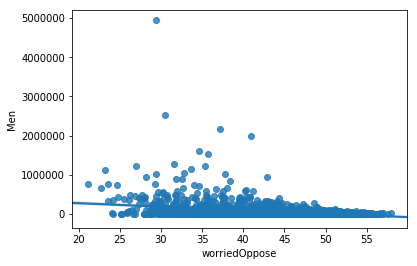

In [20]:
sns.regplot(x='worriedOppose', y = 'Men', data=datain,fit_reg=True);

In [8]:
nx = list(ycom_county)[3:-2]
ny = list(census)[4:]

In [13]:
nx

['happening',
 'happeningOppose',
 'human',
 'humanOppose',
 'consensus',
 'consensusOppose',
 'affectweather',
 'affectweatherOppose',
 'worried',
 'worriedOppose',
 'harmplants',
 'harmplantsOppose',
 'futuregen',
 'futuregenOppose',
 'devharm',
 'devharmOppose',
 'harmUS',
 'harmUSOppose',
 'personal',
 'personalOppose',
 'timing',
 'timingOppose',
 'fundrenewables',
 'fundrenewablesOppose',
 'regulate',
 'regulateOppose',
 'CO2limits',
 'CO2limitsOppose',
 'reducetax',
 'reducetaxOppose',
 'supportRPS',
 'supportRPSOppose',
 'rebates',
 'rebatesOppose',
 'drillANWR',
 'drillANWROppose',
 'drilloffshore',
 'drilloffshoreOppose',
 'teachGW',
 'teachGWOppose',
 'corporations',
 'corporationsOppose',
 'citizens',
 'citizensOppose',
 'congress',
 'congressOppose',
 'governor',
 'governorOppose',
 'localofficials',
 'localofficialsOppose',
 'prienv',
 'prienvOppose',
 'discuss',
 'discussOppose',
 'mediaweekly',
 'mediaweeklyOppose']

In [26]:
#(Pearson's correlation coefficient,2-tailed p-value)
# 
corr_outputs = np.zeros((len(nx),len(ny),5))
for x in range(len(nx)):
    for y in range(len(ny)):
        corr_outputs[x,y,:] = linregress(ycom_county[nx[x]], census[ny[y]]) 
        

In [59]:
nx[9]
ny[0]
x = 9
y = 0
aa = linregress(ycom_county[nx[x]], census[ny[y]]) 

In [60]:
print(len(nx),len(ny))
print(corr_outputs.shape)

56 33
(56, 33, 5)


In [61]:
aa

LinregressResult(slope=-8890.196105214072, intercept=456155.12276731385, rvalue=-0.345654944393374, pvalue=7.185013470572805e-89, stderr=430.69914702984505)

In [63]:
corr_outputs[x,y,:]

array([-8.89019611e+03,  4.56155123e+05, -3.45654944e-01,  7.18501347e-89,
        4.30699147e+02])

In [64]:
corr_outputs[x,:,2]

array([-0.34565494, -0.34816098, -0.40834579,  0.61709329, -0.26123406,
       -0.18899218, -0.47471037, -0.11967365, -0.35809404,         nan,
               nan, -0.25146756,  0.1166843 , -0.12598338,         nan,
       -0.33899917, -0.28183259, -0.04974089,  0.26148616,  0.38626699,
        0.47036081, -0.10173435, -0.43348214, -0.27993044, -0.27551329,
       -0.1454619 ,  0.04407875, -0.35262497,  0.12059118, -0.21446105,
        0.10491224,  0.0424432 , -0.19673243])

In [38]:
color_map = plt.cm.RdYlBu(np.linspace(0, 1.1, 20))
color_map = ListedColormap(color_map[::-1]) 

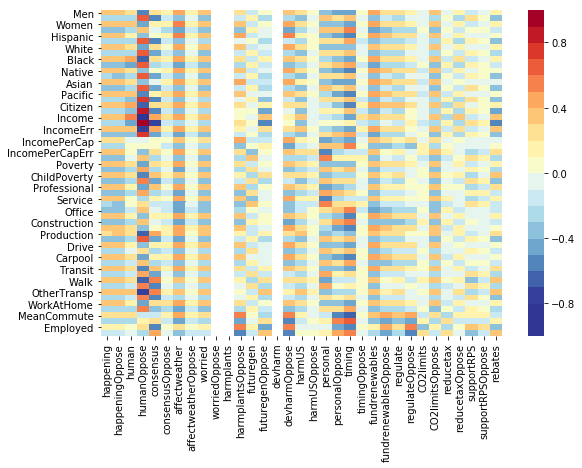

In [65]:
f, ax = plt.subplots(figsize=(9, 6))
fig= sns.heatmap(corr_outputs[:,:,2],cmap = color_map,vmin = -1 , vmax = 1, ax = ax)
ax.set_xticklabels(nx)
ax.set_yticklabels(ny)
#plt.savefig('heat_map.png', dpi=300, bbox_inches='tight')       
plt.show()

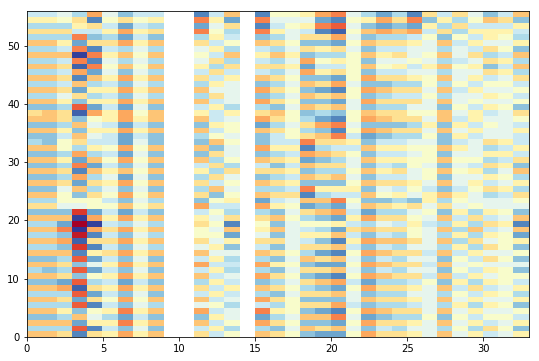

In [70]:
f, ax = plt.subplots(figsize=(9, 6))
ax.pcolor(np.ma.masked_where(np.isnan(corr_outputs[:,:,2]),corr_outputs[:,:,2]),cmap = color_map,vmin = -1 , vmax = 1)
plt.show()

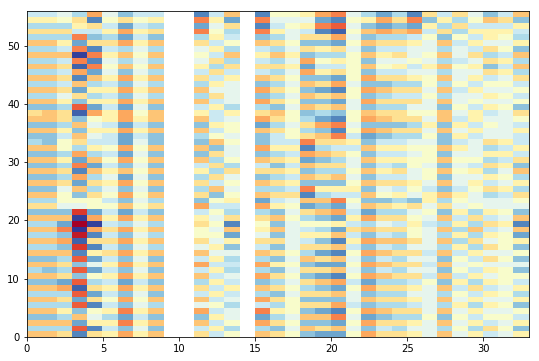

In [71]:
f, ax = plt.subplots(figsize=(9, 6))
ax.pcolor(corr_outputs[:,:,2],cmap = color_map,vmin = -1 , vmax = 1)
plt.show()

In [72]:
corr_outputs[:,0,2]

array([ 0.33467932, -0.29170863,  0.36775332, -0.33480226,  0.3400988 ,
       -0.28920644,  0.32110863, -0.29071517,  0.34723574, -0.34565494,
        0.32253098, -0.299223  ,  0.32732954, -0.30511635,  0.33824823,
       -0.2893267 ,  0.32679224, -0.26763608,  0.31548294, -0.23659355,
        0.324322  , -0.32432368,  0.2433539 , -0.20800916,  0.33221594,
       -0.31651794,  0.32115523, -0.31911678,  0.30438154, -0.31307997,
        0.35934477, -0.34982008,  0.32117246, -0.29889978, -0.30672423,
        0.32098541, -0.30934554,  0.32194327,  0.29843545, -0.301398  ,
        0.30591052, -0.27728255,  0.31524677, -0.2791875 ,  0.32691389,
       -0.27763267,  0.32553466, -0.25448771,  0.33152879, -0.23899712,
        0.30659735, -0.29488458,  0.28535001, -0.28268304,  0.11092216,
       -0.13499641])

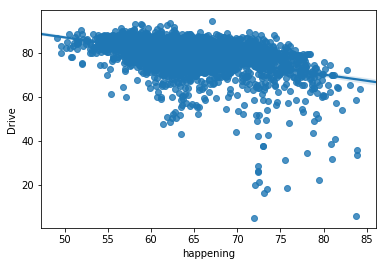

In [131]:
sns.regplot(x='happening', y = 'Drive', data=datain,fit_reg=True);